Librosa: Audio processing

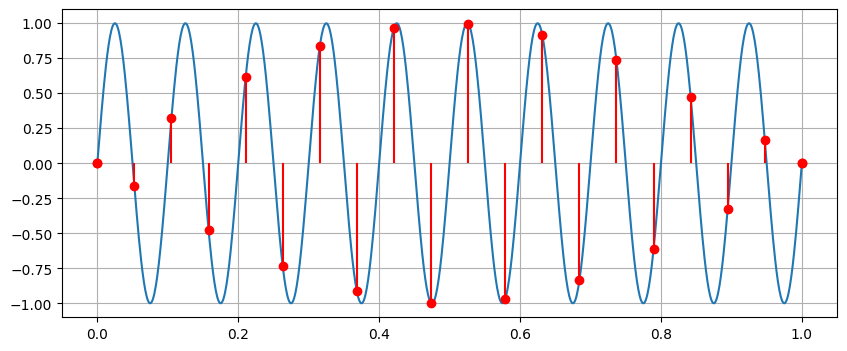

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t= np.linspace(0,1,1000)
analog_signal= np.sin(2*np.pi*10*t)

sample_t= np.linspace(0,1,20)
sample_signal= np.sin(2*np.pi*10*sample_t)

plt.figure(figsize=(10,4))
plt.plot(t, analog_signal)
plt.stem(sample_t, sample_signal, linefmt='r-', markerfmt='ro', basefmt='ro') #for mark and line draw
plt.grid()
plt.show()

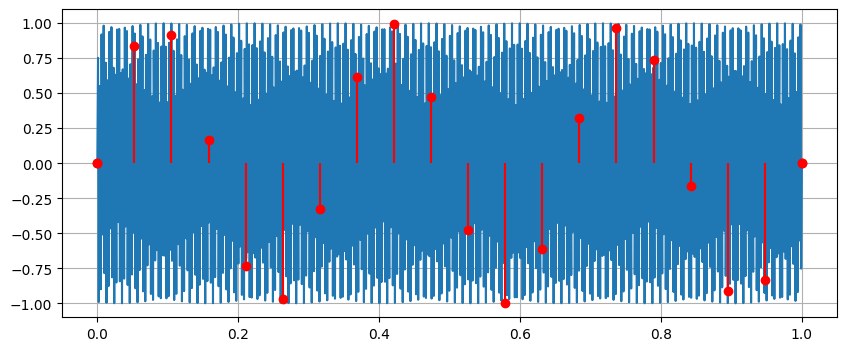

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t= np.linspace(0,1,1000)
analog_signal= np.sin(2*np.pi*364*t)

sample_t= np.linspace(0,1,20)
sample_signal= np.sin(2*np.pi*364*sample_t)

plt.figure(figsize=(10,4))
plt.plot(t, analog_signal)
plt.stem(sample_t, sample_signal, linefmt='r-', markerfmt='ro', basefmt='ro') #for mark and line draw
plt.grid()
plt.show()

In [3]:
import librosa
import librosa.display
from IPython.display import Audio

y, sr= librosa.load(librosa.ex('trumpet'))
#for more example: https://librosa.org/doc/main/recordings.html
Audio(y,rate=sr)

In [9]:
y_slow = librosa.effects.time_stretch(y, rate=0.5)
Audio(y_slow, rate=sr)

In [23]:
y_fast = librosa.effects.time_stretch(y, rate=1.5)
Audio(y_fast, rate=sr)

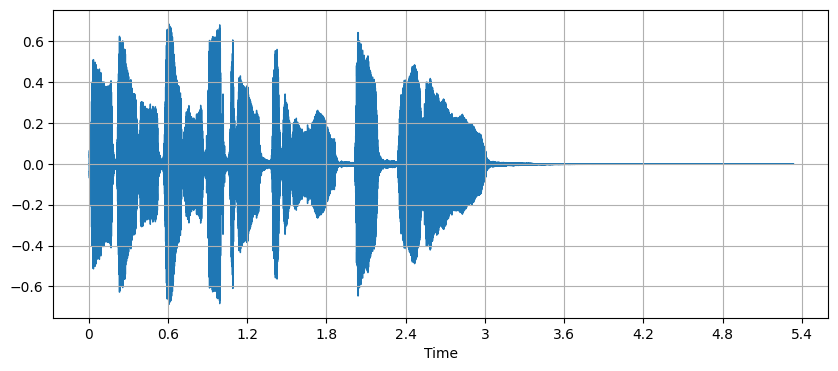

In [10]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(y,sr=sr)
plt.grid()
plt.show()

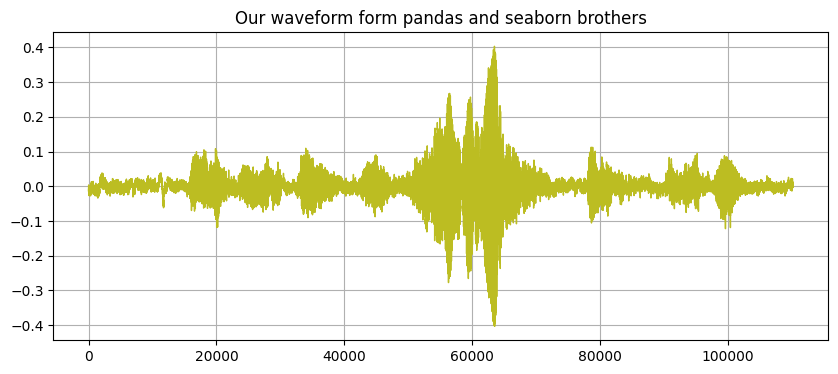

In [6]:
import pandas as pd
import seaborn as sns
color_pal= sns.color_palette()

pd.Series(y).plot(figsize=(10,4), lw=1, 
                  title="Our waveform form pandas and seaborn brothers",
                  color= color_pal[8])  #number is for color

plt.grid()
plt.show()

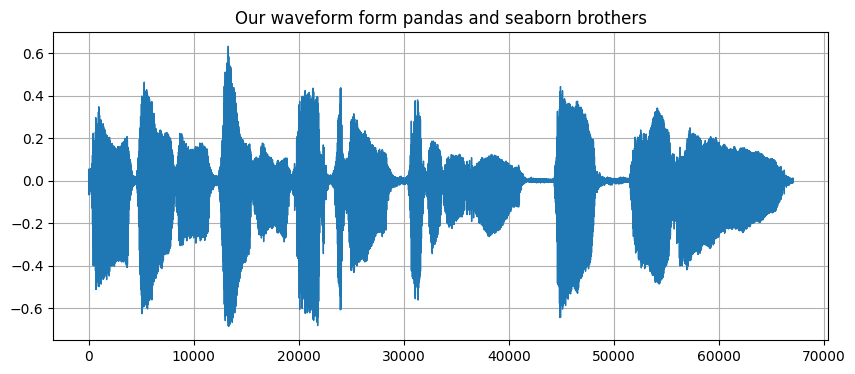

In [32]:
y_trimmed,_= librosa.effects.trim(y,top_db=20) #trim the part which is scilent
pd.Series(y_trimmed).plot(figsize=(10,4), lw=1, 
                  title="Our waveform form pandas and seaborn brothers",
                  color= color_pal[0]) 

plt.grid()
plt.show()

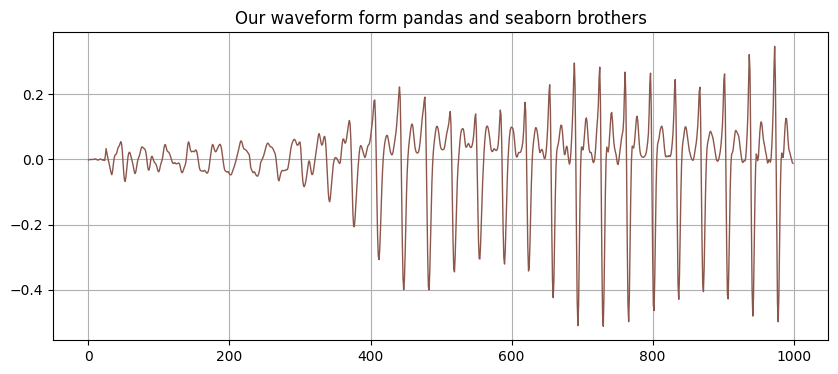

In [28]:
y_trimmed,_= librosa.effects.trim(y,top_db=20) #trim the part which is scilent
pd.Series(y_trimmed[0:1000]).plot(figsize=(10,4), lw=1, #y_trimmed[which potion i want to zoom]
                  title="Our waveform form pandas and seaborn brothers",
                  color= color_pal[5]) #number is for color

plt.grid()
plt.show()

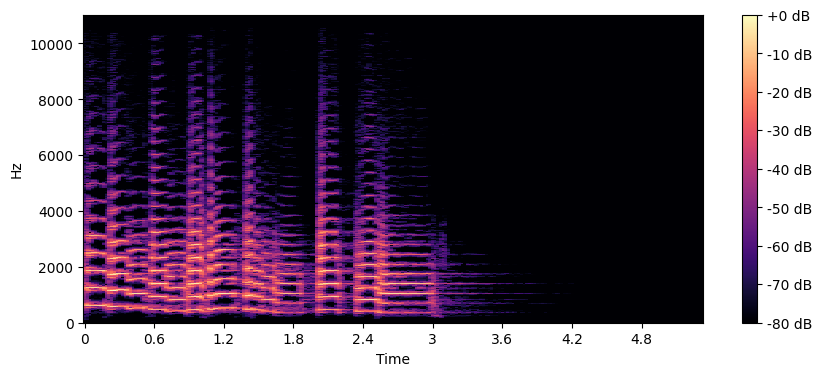

In [ ]:
D= librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10,4))
librosa.display.specshow(D,sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format='%+2.0f dB')
plt.title('Trumpet Spectrogram')
plt.show()

In [1]:
'''Record the Audio'''
import sounddevice as sd
import soundfile as sf
from IPython.display import Audio

duration = 5  # seconds
samplerate = 22050  # Hz

print("Recording...")
audio = sd.rec(int(duration * samplerate), samplerate=samplerate, channels=1)
sd.wait()
sf.write('my_voice.wav', audio, samplerate)
print("Recording saved as my_voice.wav")
Audio('my_voice.wav')

Recording...
Recording saved as my_voice.wav


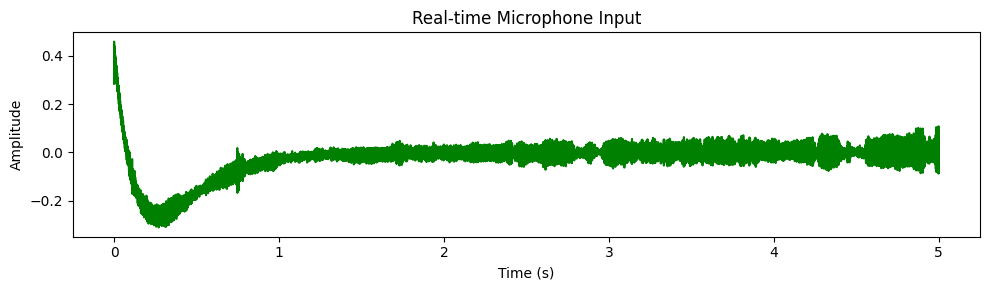

In [5]:
# 🔄 Convert to 1D array
audio = audio.flatten()

# 📊 Plot waveform
plt.figure(figsize=(10, 3))
plt.plot(np.linspace(0, duration, len(audio)), audio, color='green')
plt.title('Real-time Microphone Input')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

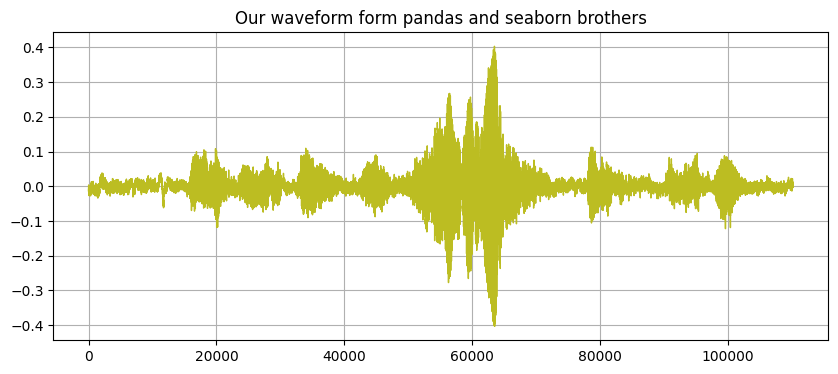

In [8]:
y,sr= librosa.load("my_voice.wav")
color_pal= sns.color_palette()

pd.Series(y).plot(figsize=(10,4), lw=1, 
                  title="Our waveform form pandas and seaborn brothers",
                  color= color_pal[8])  #number is for color

plt.grid()
plt.show()

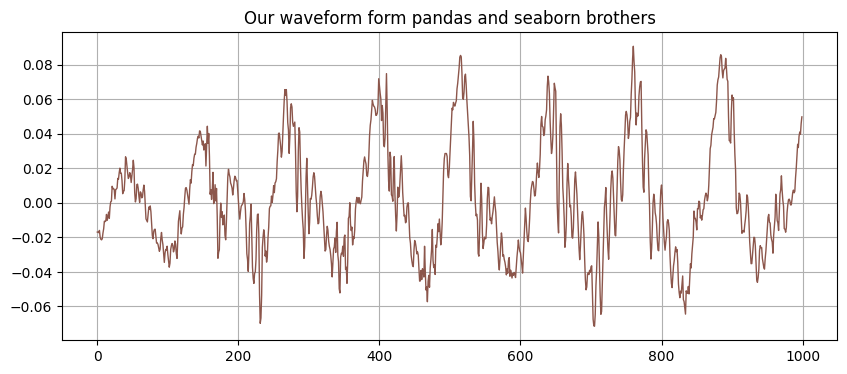

In [9]:
y_trimmed,_= librosa.effects.trim(y,top_db=20) #trim the part which is scilent
pd.Series(y_trimmed[0:1000]).plot(figsize=(10,4), lw=1, #y_trimmed[which potion i want to zoom]
                  title="Our waveform form pandas and seaborn brothers",
                  color= color_pal[5]) #number is for color

plt.grid()
plt.show()

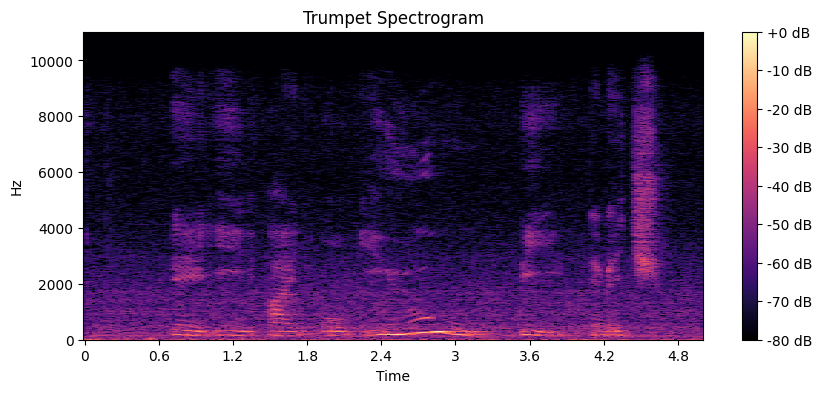

In [ ]:
import noisereduce as nr #for noice cancelation
y_trimmed, _ = librosa.effects.trim(y)

# Estimate noise from first 0.5s
noise_sample = y_trimmed[:int(0.5 * sr)]

# Apply spectral noise reduction
y_denoised = nr.reduce_noise(y=y_trimmed, sr=sr, y_noise=noise_sample)

D= librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10,4))
librosa.display.specshow(D,sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()